In [1]:
import numpy as np
import pylab as py
import random as rd

In [2]:
R = 1 

A_Box = 4 #Since radius is 1, the box around the circle will be 2 x 2 
N_in = 0
N_tot = 10**7 #Values greater than this take much longer to compute, 10^7 takes about 20 seconds

x_inside = np.zeros(N_tot)
y_inside = np.zeros(N_tot)

x_outside = np.zeros(N_tot)
y_outside = np.zeros(N_tot)

#Couldn't figure out which function created all the random numbers at once, tried using random.sample but did not work

for n in range(N_tot):
    X = 2 * rd.random() #Picks values between 0 and 1 (not including 1)
    Y = 2 * rd.random()
    if (X - 1)**2 + (Y - 1)**2 < R**2: #not including the edge of the circle
        N_in += 1
        x_inside[n] = X
        y_inside[n] = Y
        
    else:
        x_outside[n] = X
        y_outside[n] = Y

#Getting rid of zeros (masking) so it does not get plotted since we do not know the true length of the array beforehand

x_inside = np.ma.masked_equal(x_inside,0)
y_inside = np.ma.masked_equal(y_inside,0)

x_outside = np.ma.masked_equal(x_outside,0)
y_outside = np.ma.masked_equal(y_outside,0)


#This also works but I believe it takes more time
'''x_inside = x_inside[x_inside != 0]
y_inside = y_inside[y_inside != 0]

x_outside = x_outside[x_outside != 0]
y_outside = y_outside[y_outside != 0]'''
        
I = A_Box * N_in/N_tot #Approximate Area of the Circle, = pi * r^2

Pi_Approx = I/R**2
print(f'The approximate value of pi using Monte Carlo Integration is: {Pi_Approx}')

The approximate value of pi using Monte Carlo Integration is: 3.1424924


In [3]:
Relative_Error = abs(np.pi - Pi_Approx)/np.pi
print(f'The Relative Error is approximately = {Relative_Error}')

Error_Proportion = 1/np.sqrt(N_tot)
print(f'The Error is proportional to: {Error_Proportion}')

The Relative Error is approximately = 0.0002863981774272512
The Error is proportional to: 0.00031622776601683794


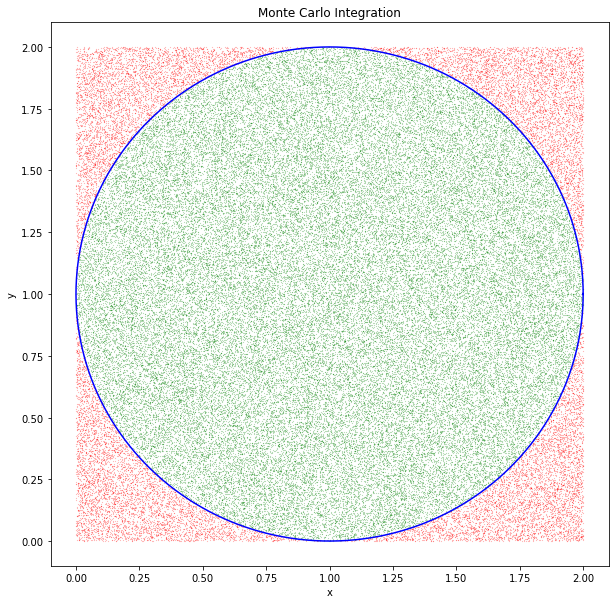

In [4]:
fig1 = py.figure(figsize=(10,10));

theta = np.linspace( 0 , 2 * np.pi, 1000) 
  
xC = R * np.cos(theta) + 1
yC = R * np.sin(theta) + 1

py.plot(xC, yC, color = 'blue')
py.title('Monte Carlo Integration')
py.xlabel('x')
py.ylabel('y')

#Not plotting every single point so I define a stop index/element to plot the graph much faster
Stop = N_tot//100

py.scatter(x_inside[:Stop], y_inside[:Stop], marker='o', s = .01, color = 'g')
py.scatter(x_outside[:Stop], y_outside[:Stop], marker='o', s = .01, color = 'r')